<center>
<h1>Programming Exercise 1:<br>Linear Regression<br></h1>
<h2>Machine Learning<br></h2>
</center>

# Introduction

In this exercise, you will implement linear regression and get to see it work
on data. Before starting on this programming exercise, we strongly recommend
watching the video lectures and completing the review questions for
the associated topics.

For this programming exercise, you are only required to complete the first
part of the exercise to implement linear regression with one variable. The
second part of the exercise, which is optional, covers linear regression with
multiple variables.

In [28]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

import mlcourse.submission

submit = mlcourse.submission.create_submission('ex1')

%matplotlib inline

# Basic Function

The first part of this exercise gives you practice with Python syntax and
the homework submission process. In the following function `warmUpExercise()`,
you will find the outline of a Python function. Modify it to return a 5 x
5 identity matrix by filling in the following code:

`A = np.eye(5)`

When you are finished, run the cell by pressing `Ctrl+Enter` and you should see
output similar to the following:

```
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])
```


In [29]:
def warm_up_exercise():
    """
    Example function in Python that returns a 5x5 identity matrix.
    """
    
    # ============= YOUR CODE HERE ==============
    # Instructions:
    #     Return the 5x5 identity matrix.
    #     In Python we return values using the `return` keyword
    #     followed by the value to be retured.
    
    # You need to set A to the required value.
    A = np.eye(5)
    
    # ===========================================
    
    return A


print('Running warm_up_exercise() ...')
print('5x5 Identity Matrix:')
warm_up_exercise()

Running warm_up_exercise() ...
5x5 Identity Matrix:


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## Submitting Solutions
After completing a part of the exercise, you can submit your solutions for
grading by calling the `submit()` function. You need to pass your login email
and submission token as strings to the submit function. You can obtain a submission
token from the web page for the assignment.

We have assigned your login email and submission token to variables to avoid typing
them everytime.

In [30]:
login_email = 'email@example.com'
submission_token = 'SUBMISSIONTOKEN'

*You should now submit your solutions*

You are allowed to submit your solutions multiple times, and we will take
only the highest score into consideration.

In [31]:
submit(login_email, submission_token)

'email@example.com successfully submitted ex1'

# Linear Regression With One Variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

You would like to use this data to help you select which city to expand
to next.

The file `ex1data1.csv` contains the dataset for our linear regression problem.
The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

The following cells will load this data for you.


In [32]:
# read comma separated data
data = pd.read_csv('./data/ex1/ex1data1.csv', header=None)

X = np.matrix([data[0]]).T
y = np.matrix([data[1]]).T

# number of training examples
m = y.size

## Plotting the Data

Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.)

In the last cell the data is loaded from the data file into the variables
`X` and `y`.

The notebook calls the `plot_data()` function to create a scatter plot of
the data. Your job is to complete plot_data to draw the plot; modify the
next cell and fill in the following code:

```python
    plt.plot(x, y, 'rx', markersize=12)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
```



In [33]:
def plot_data(x, y):
    """
    Plots the data points `x` and `y` into a new figure.
    
    plot_data(x, y) plots the data points and gives the figure 
    axes labels of population and profit.
    """
    
    # ====================== YOUR CODE HERE ======================
    # Instructions:
    #     Plot the training data into a figure using the  
    #     plt.figure() and plt.plot() commands. Set the axes 
    #     labels using the plt.xlabel() and plt.ylabel commands.
    #     Assume the population and revenue data have been 
    #     passed in as the x and y arguments of this function.
    #
    # Hint:
    #     You can use the 'rx' option with plt.plot() to have
    #     the markers appear as red crosses. Furthermore, you can
    #     make the markers larger by using 
    #         plt.plot(..., 'rx', markersize=12)
    
    plt.plot(x, y, 'rx', markersize=12)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')

    # ============================================================

Now, when you run the next cell, our end result should look like
Figure 1, with the same red `x` markers and axis labels.

To learn more about the `plt.plot()` command, you can type `help(plt.plot)`
at the Python interpreter or to search online for plotting documentation.
(To change the markers to red `x`, we used the option `rx`
together with the `plot` command, i.e.,
```plt.plot(..,[your options here],..,'rx')``` )

<center>
    <img src='./figs/ex1_fig1.png'>
    Figure 1:  Scatter plot of training data
</center>

Plotting Data ...


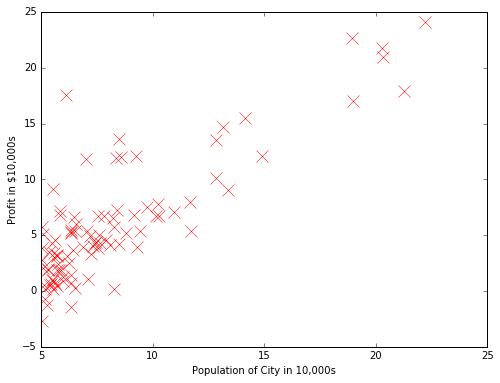

In [34]:
print('Plotting Data ...')

# Plot Data
# Note: You have to complete the code in plotData()

# create a new figure window
plt.figure(figsize=(8, 6))
plot_data(X, y)

## Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset
using gradient descent.

### Update Equations
The objective of linear regression is to minimize the cost function

$$ J(\theta) = \dfrac{1}{2m}\sum_{i = 1}^m(h_\theta(x^{(i)}) - y^{(i)})^2 $$

where the hypothesis $h_\theta(x)$ is given by the linear model

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j := \theta_j - \alpha \dfrac{1}{m}\sum_{i = 1}^m(h_\theta(x^{(i)}) - y^{(i)})x_{j}^{(i)} $$

(simultaneously update $\theta_j$ for all $j$).

With each step of gradient descent, your parameters $\theta_j$ come closer to the
optimal values that will achieve the lowest cost $J(\theta)$.

> **Implementation Note:**
> We store each example as a row in the the `X` matrix.
> To take into account the intercept term ($\theta_0$),
> we add an additional first column to `X` and set it to
> all ones. This allows us to treat $\theta_0$ as simply
> another 'feature'


### Implementation

Here we set up the data for linear regression. In the following lines,
we add another dimension to our data to accommodate the $\theta_0$
intercept term. We also initialize the initial parameters to $0$ and the
learning rate `alpha` to $0.01$.

In [35]:
# Add a column of ones to X
X = np.matrix([np.ones((m)), np.array(data[0])]).T

# initialize fitting parameters
theta = np.matrix(np.zeros((2, 1)))

# Some gradient descent settings
iterations = 1500
alpha = 0.01


### Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$,
it is helpful to monitor the convergence by computing the cost. In this
section, you will implement a function to calculate $J(\theta)$ so you can check the
convergence of your gradient descent implementation.

Your next task is to complete the code in `compute_cost`, which
is a function that computes $J(\theta)$. As you are doing this, remember that the
variables `X` and `y` are not scalar values, but matrices whose rows represent
the examples from the training set.

Once you have completed the function, the next cell will run
`compute_cost` once using $\theta$ initialized to zeros, and you will see the cost
printed to the screen.

You should expect to see a cost of $32.07$.


In [36]:
def compute_cost(X, y, theta):
    """Compute cost for linear regression.
    
    Computes the cost of using theta as the parameter for linear
    regression to fit the data points in X and y
    """
    
    # initialize some useful values
    m = y.size
    
    # You need to return the following values correctly
    J = 0
    
    # ====================== YOUR CODE HERE ======================
    # Instructions:
    #     Compute the cost of a particular choice of theta
    #     You should set J to the cost.
    
    J = (1.0/(2*m))*((np.square(X*theta - y)).sum())
    
    # ============================================================
    
    return J

# compute and display initial cost
J = compute_cost(X, y, theta)

print('J = {}'.format(J))

J = 32.0727338775


In [37]:
# You should now submit your solutions
submit(login_email, submission_token)

'email@example.com successfully submitted ex1'

### Gradient descent

Next, you will implement gradient descent in `gradient_descent()`.
The loop structure has been written for you, and you only need to supply
the updates to $\theta$ within each iteration.

As you program, make sure you understand what you are trying to optimize
and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized
by the vector $\theta$, not `X` and `y`. That is, we minimize the value of $J(\theta)$
by changing the values of the vector $\theta$, not by changing `X` or `y`. Refer to the
equations in this notebook and to the video lectures if you are uncertain.

A good way to verify that gradient descent is working correctly is to look
at the value of $J(\theta)$ and check that it is decreasing with each step. The
starter code for `gradient_descent()` calls `compute_cost()` on every iteration
and prints the cost. Assuming you have implemented gradient descent and
`compute_cost` correctly, your value of $J(\theta)$ should never increase, and should
converge to a steady value by the end of the algorithm.

After you are finished, we will use your final parameters to plot the
linear fit.

The result should look something like Figure 2:

<center>
<img src='./figs/ex1_fig2.png'>
Figure 2: Training Data with Regression Fit
</center>

    
Your final values for $\theta$ will also be used to make predictions on profits in
areas of $35,000$ and $70,000$ people. Note the way that the following lines in
use matrix multiplication, rather than explicit summation or looping,
to calculate the predictions. This is an example of code vectorization.


In [38]:
def gradient_descent(X, y, theta, alpha, num_iters):
    """Performs gradient descent to learn theta.
    
    `gradient_descent` updates theta by taking `num_iters` steps with
    learning rate `alpha`
    """
    
    # Initialize some useful values
    
    # number of training examples
    m = y.size
    
    J_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        # ====================== YOUR CODE HERE ======================
        # Instructions:
        #     Perform a single gradient step on the parameter vector
        #     theta. 
        #
        # Hint:
        #     While debugging, it can be useful to print out the values
        #     of the cost function (compute_cost) and gradient here.
        #
        
        theta = theta - (alpha/m) * np.multiply((X*theta - y), X).sum(axis=0).T

        # ============================================================

        # Save the cost J in every iteration    
        J_history[i] = compute_cost(X, y, theta)
        
        ## print out the cost (for debugging)
        # print('Cost on iteration {} = {}'.format(i, J_history[i]))
        
    return theta, J_history

Theta found by gradient descent: [[-3.63029144]], [[ 1.16636235]]


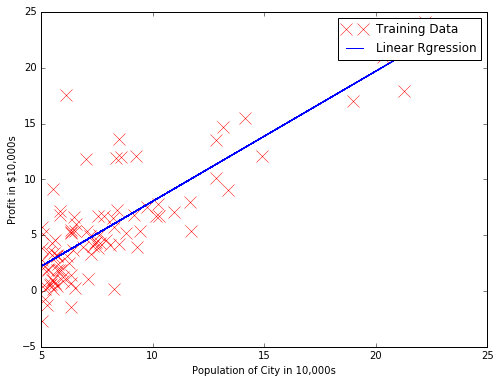

In [39]:
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

# % print theta to screen
print('Theta found by gradient descent: {}, {}'.format(theta[0], theta[1]))

plt.figure(figsize=(8, 6))
plot_data(data[0], data[1])
plt.plot(X[:, 1], X.dot(theta), 'b-', )
plt.legend(['Training Data', 'Linear Rgression'])

In [40]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
print('For population = 35,000, we predict a profit of {}'.format(predict1.item(0)*10000))

predict2 = np.array([1, 7]).dot(theta)
print('For population = 70,000, we predict a profit of {}'.format(predict2.item(0)*10000))

For population = 35,000, we predict a profit of 4519.7678677
For population = 70,000, we predict a profit of 45342.4501294


In [41]:
# You should now submit your solutions
submit(login_email, submission_token)

'email@example.com successfully submitted ex1'

## Debugging

Here are some things to keep in mind as you implement gradient descent:

* If you are seeing many errors at runtime, inspect your matrix operations
    to make sure that you're adding and multiplying matrices of compatible
    dimensions. Printing the dimensions of variables with the size
    command will help you debug.
* By default, `numpy.matrix` math operators are matrix
    operators. This is a common source of size incompatibility errors. If you
    want matrix multiplication, you need to use the `*` operator
    to specify this to Python. For example, `np.multiply(A, B)` does an element wise
    mulitplication, while `A * B` performs a matrix multiplication when 
    `A` and `B` are numpy matrices.

## Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over
a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything
new for this part, but you should understand how the code you have written
already is creating these images.

In the next step, there is code set up to calculate $J(\theta)$ over a
grid of values using the compute_cost function that you wrote.


```python
    for i in range(len(theta0_vals)):
        for j in range(len(theta1_vals)):
            t = np.array(theta1_vals[i], theta1_vals[j])
            J_vals[i, j] = compute_cost(X, y, t)
```

After these lines are executed, you will have a 2-D array of $J(\theta)$ values.
The notebook will then use these values to produce surface and contour
plots of $J(\theta)$ using the surf and contour commands. The plots should look
something like Figure 3:

<center>
<img src='./figs/ex1_fig3.png'>
Figure 3: Cost function $J(\theta)$. Surface plot (left) and contour plot showing the minimum (right)
</center>


Visualizing J(theta_0, theta_1) ...


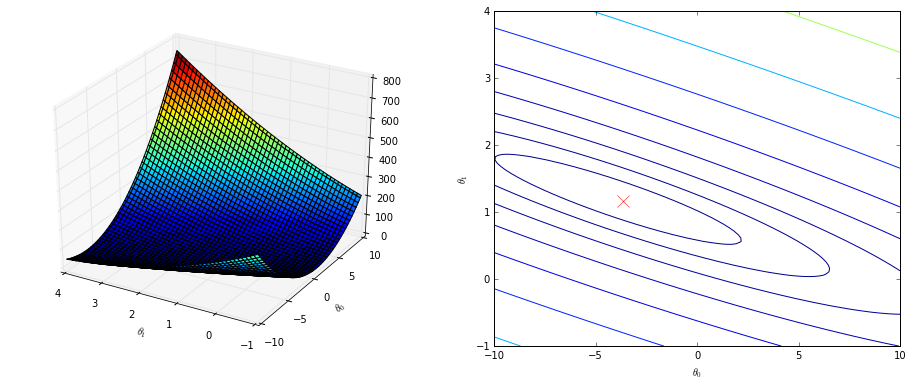

In [15]:
print('Visualizing J(theta_0, theta_1) ...')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[j][i] = compute_cost(X, y, t)
                

# Surface Plot
fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(theta1, theta0, J_vals.T, rstride=2, cstride=2, cmap='jet')
ax.invert_xaxis()
plt.xlabel('$\\theta_1$')
plt.ylabel('$\\theta_0$')

# Contour Plot
ax = fig.add_subplot(1, 2, 2)

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax.contour(theta0_vals, theta1_vals, J_vals, 15, levels=np.logspace(-2, 3, 20))
ax.plot(theta[0], theta[1], 'rx', markersize=12, linewidth=2)
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')

---

# Optional Exercises
If you have successfully completed the material above, congratulations! You
now understand linear regression and should able to start using it on your
own datasets.

For the rest of this programming exercise, we have included the following
optional exercises. These exercises will help you gain a deeper understanding
of the material, and if you are able to do so, we encourage you to complete
them as well.

# Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland,
Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

The following cells have been set up to help you step through this
exercise.

In [16]:
print('Loading data ...\n');

# read comma separated data
data = pd.read_csv('./data/ex1/ex1data2.csv', header=None)

X = np.matrix([data[0], data[1]]).T
y = np.matrix([data[2]]).T

# number of training examples
m = y.size

# Print out some data points
print('First 10 examples from the dataset:')
for i in range(10):
    print('x = {}, y = {}'.format(X[i], y[i]))

Loading data ...

First 10 examples from the dataset:
x = [[2104    3]], y = [[399900]]
x = [[1600    3]], y = [[329900]]
x = [[2400    3]], y = [[369000]]
x = [[1416    2]], y = [[232000]]
x = [[3000    4]], y = [[539900]]
x = [[1985    4]], y = [[299900]]
x = [[1534    3]], y = [[314900]]
x = [[1427    3]], y = [[198999]]
x = [[1380    3]], y = [[212000]]
x = [[1494    3]], y = [[242500]]


## Feature Normalization
The last cell loaded and displayed some values from the dataset.
By looking at the values, note that house sizes are about
1000 times the number of bedrooms. When features differ by orders of magnitude,
first performing feature scaling can make gradient descent converge
much more quickly.

Your task here is to complete the code in `feature_normalize()` to
* Subtract the mean value of each feature from the dataset.
* After subtracting the mean, additionally scale (divide) the feature values
    by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is
in the range of values of a particular feature (most data points will lie within
$\pm 2$ standard deviations of the mean); this is an alternative to taking the range
of values (max-min). In `numpy`, you can use the `np.std` function to
compute the standard deviation. For example, inside `feature_normalize`,
the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training
set, so `np.std(X[:, 0))` computes the standard deviation of the house sizes.
At the time that `feature_normalize` is called, the extra column of 1’s
corresponding to $x_0 = 1$ has not yet been added to `X`.

You will do this for all the features and your code should work with
datasets of all sizes (any number of features / examples). Note that each
column of the matrix X corresponds to one feature.

> **Implementation Note:** When normalizing the features, it is important
> to store the values used for normalization - the mean value and the standard
> deviation used for the computations. After learning the parameters
> from the model, we often want to predict the prices of houses we have not
> seen before. Given a new $x$ value (living room area and number of bedrooms),
> we must first normalize $x$ using the mean and standard deviation
> that we had previously computed from the training set.

In [17]:
def feature_normalize(X):
    """Normalizes features in X
    
    feature_normalize() returns a normalized version of X where
    the mean value of each feature if 0 and the standard 
    deviation is 1. This is often a good preprocessing step
    to do when working with learning algorithms."""

    # You need to set these values correctly
    X_norm = X
    mu = np.matrix(np.zeros((X.shape[1], 0)))
    sigma = np.matrix(np.zeros((X.shape[1], 0)))

    # ====================== YOUR CODE HERE ======================
    # Instructions:
    #     First, for each feature dimension, compute the mean
    #     of the feature and subtract it from the dataset,
    #     storing the mean value in mu. Next, compute the 
    #     standard deviation of each feature and divide
    #     each feature by it's standard deviation, storing
    #     the standard deviation in sigma. 
    #
    #     Note that X is a matrix where each column is a 
    #     feature and each row is an example. You need 
    #     to perform the normalization separately for 
    #     each feature. 
    #
    # Hint:
    #     You might find the 'np.mean' and 'np.std' functions useful.       

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    X_norm = (X - mu)/sigma

    # ============================================================

    return X_norm, mu, sigma

In [18]:
# Scale features and set them to zero mean
print('Normalizing Features ...');
X, mu, sigma = feature_normalize(X)

# Add intercept term to X
K = np.empty((m, 1 + X.shape[1]))
K[:, 0] = np.ones(m); K[:, 1:] = X
X = K

Normalizing Features ...


In [19]:
# You should now submit your solutions
submit(login_email, submission_token)

'email@example.com successfully submitted ex1'

## Gradient Descent
Previously, you implemented gradient descent on a univariate regression
problem. The only difference now is that there is one more feature in the
matrix `X`. The hypothesis function and the batch gradient descent update
rule remain unchanged.

You should complete the code in `compute_cost_multi` and `gradient_descent_multi`
to implement the cost function and gradient descent for linear regression with
multiple variables. If your code in the previous part (single variable) already
supports multiple variables, you can use it here too.

Make sure your code supports any number of features and is well-vectorized.
You can use `X.shape[1]` to find out how many features are present in the
dataset.

> Implementation Note: In the multivariate case, the cost function can
> also be written in the following vectorized form:
>
> $$ J(\theta) = \dfrac{1}{2m}(X\theta - \vec{y})^T\times(X\theta - \vec{y}) $$
>
> Where
>
> $$
    X = \left[\begin{matrix} -\ (x^{(1)})^T\ - \\ -\ (x^{(2)})^T\ - \\ \vdots \\ -\ (x^{(n)})^T\ - \end{matrix}\right]
    \qquad
    \vec{y} = \left[\begin{matrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(n)} \end{matrix}\right]
  $$
>
> The vectorized version is efficient when you’re working with numerical
> computing libraries like numpy. If you are an expert with matrix
> operations, you can prove to yourself that the two forms are equivalent.

In [20]:
def compute_cost_multi(X, y, theta):
    """Compute cost for linear regression with multiple variables

    Computes the cost of using theta as the parameter for linear
    regression to fit the data points in X and y.
    """

    # Initialize some useful values
    
    # number of training examples
    m = y.size

    # You need to return the following variables correctly 
    J = 0

    # ====================== YOUR CODE HERE ======================
    # Instructions:
    #     Compute the cost of a particular choice of theta
    #     You should set J to the cost.

    J = compute_cost(X, y, theta)

    # ============================================================
    
    return J

In [21]:
def gradient_descent_multi(X, y, theta, alpha, num_iters):    
    """Performs gradient descent to learn theta

    Updates theta by taking num_iters gradient steps 
    with learning rate alpha
    """
    
    # Initialize some useful values
    
    # number of training examples
    m = y.size
    
    J_history = np.zeros((num_iters, 1))

#     for i in range(num_iters):

        # ====================== YOUR CODE HERE ======================
        # Instructions:
        #     Perform a single gradient step on the parameter vector
        #     theta. 
        #
        # Hint:
        #     While debugging, it can be useful to print out the values
        #     of the cost function (compute_cost_multi) and gradient here.
        #
    
    theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

        # ============================================================

        # Save the cost J in every iteration    
#         J_history[i] = compute_cost_multi(X, y, theta)
    
    return theta, J_history

### Optional (ungraded) exercise: Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for
the dataset and find a learning rate that converges quickly. You can change
the learning rate by modifying the next cell and changing the part of the
code that sets the learning rate.

The next cell will call your `gradient_descent()` function
and run gradient descent for about 50 iterations at the chosen learning
rate. The function should also return the history of $J(\theta)$ values in a vector
`J`. After the last iteration, the cell plots the $J$ values against
the number of the iterations.

If you picked a learning rate within a good range, your plot should look similar
to Figure 4. If your graph looks very different, especially if your value of $J(\theta)$
increases or even blows up, adjust your learning rate and try again. We recommend
trying values of the learning rate $\alpha$ on a log-scale, at multiplicative
steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on).
You may also want to adjust the number of iterations you are running if that
will help you see the overall trend in the curve.

<center>
<img src='./figs/ex1_fig4.png'>
Figure 4: Convergence of gradient descent with an appropriate learning rate
</center>

> **Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge
> and ‘blow up’, resulting in values which are too large for computer
> calculations. In these situations, numpy will tend to return
> `nan`s. `nan` stands for ‘not a number’ and is often caused by undefined
> . operations that involve $-\infty$ and $+\infty$.
>
> ---
>
> **Python Tip:** To compare how different learning learning
> rates affect convergence, it’s helpful to plot J for several learning rates
> on the same figure. In matplotlib, this can be done by performing
> gradient descent multiple times and not calling `plt.figure()` between plots.
> Concretely, if you’ve tried three different values of alpha (you should
> probably try more values than this) and stored the costs in `J1`, `J2` and
> J3, you can use the following commands to plot them on the same figure:
>
```python 
    plt.plot(range(50), J1(:50), 'b')
    plt.plot(range(50), J2(:50), 'r')
    plt.plot(range(50), J3(:50), 'k')
```
> The final arguments `b`, `r`, and `k` specify different colors for the
> plots.


Notice the changes in the convergence curves as the learning rate changes.
With a small learning rate, you should find that gradient descent takes a very
long time to converge to the optimal value. Conversely, with a large learning
rate, gradient descent might not converge or might even diverge!

Using the best learning rate that you found, run the cell
to run gradient descent until convergence to find the final values of $\theta$. Next,
use this value of $\theta$ to predict the price of a house with 1650 square feet and
3 bedrooms. You will use this value later to check your implementation of the
normal equations. Don’t forget to normalize your features when you make
this prediction!

*You do not need to submit any solutions for these optional (ungraded)
exercises.*

Running gradient descent ...
Theta computed from gradient descent:
[[ 340412.65957447]
 [ 109447.79558639]
 [  -6578.3539709 ]]


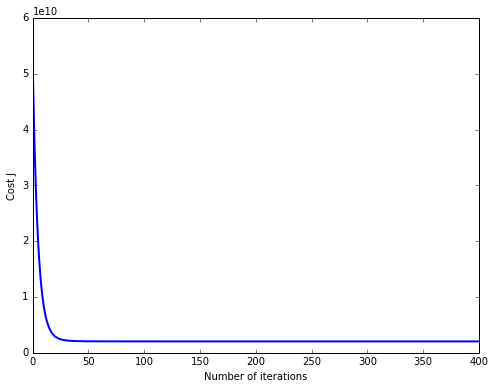

In [22]:
# ====================== YOUR CODE HERE ======================
# Instructions:
#     We have provided you with the following starter
#     code that runs gradient descent with a particular
#     learning rate (alpha). 
#
#     Your task is to first make sure that your functions - 
#     computeCost and gradientDescent already work with 
#     this starter code and support multiple variables.
#
#     After that, try running gradient descent with 
#     different values of alpha and see which one gives
#     you the best result.
#
#     Finally, you should complete the code at the end
#     to predict the price of a 1650 sq-ft, 3 br house.
#
# Hint:
#     By using the 'hold on' command, you can plot multiple
#     graphs on the same figure.
#
# Hint:
#     At prediction, make sure you do the same feature normalization.
 

print('Running gradient descent ...');

# Choose some alpha value
alpha = 0.1
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.matrix(np.zeros((3, 1)))
theta, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.figure(figsize=(8, 6))
plt.plot(range(len(J_history)), J_history, 'b-', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent:')
print(theta)

In [23]:
# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.

# You should change this
norm_details = np.divide(np.matrix([1650.0, 3.0]) - mu, sigma)
price = np.matrix([1, norm_details.item(0), norm_details.item(1)]) * theta

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):{}'.format(price.item(0)))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):293081.464529


## Normal Equations

In the lecture videos, you learned that the closed-form solution to linear
regression is

$$ \theta = (X^T X)^{-1}X^T \vec{y}. $$

Using this formula does not require any feature scaling, and you will get
an exact solution in one calculation: there is no “loop until convergence” like
in gradient descent.

Complete the code in `normal_equation()` to use the formula above to calculate
$\theta$. Remember that while you don’t need to scale your features, we still
need to add a column of 1’s to the X matrix to have an intercept term ($\theta_0$).
The prewritten code will add the column of 1’s to X for you.

In [24]:
def normal_equation(X, y):
    """Computes the closed-form solution to linear regression 

    Computes the closed-form solution to linear 
    regression using the normal equations.
    """

    theta = np.matrix(np.zeros((X.shape[1], 1)));

    # ====================== YOUR CODE HERE ======================
    # Instructions:
    #     Complete the code to compute the closed form solution
    #     to linear regression and put the result in theta.
    #
    
    theta = (((X.T * X).I) * (X.T)) * y

    # ============================================================
    
    return theta

In [25]:
print('Solving with normal equations...')

# ====================== YOUR CODE HERE ======================
# Instructions:
#     The following code computes the closed form 
#     solution for linear regression using the normal
#     equations. You should complete the code in 
#     normalEqn.m

#     After doing so, you should complete this code 
#     to predict the price of a 1650 sq-ft, 3 br house.

## Load Data
data = pd.read_csv('./data/ex1/ex1data2.csv', header=None)

X = np.array([data[0], data[1]]).T
y = np.array([data[2]]).T
m = y.size

# Add intercept term to X
K = np.empty((m, 1 + X.shape[1]))
K[:, 0] = np.ones(m); K[:, 1:] = X
X = np.matrix(K)

# Calculate the parameters from the normal equation
theta = normal_equation(X, y)

# Display normal equation's result
print('Theta computed from the normal equations:')
print(theta)

Solving with normal equations...
Theta computed from the normal equations:
[[ 89597.9095428 ]
 [   139.21067402]
 [ -8738.01911233]]


In [26]:
# You should now submit your solutions
submit(login_email, submission_token)

'email@example.com successfully submitted ex1'

*Optional (ungraded) exercise:* Now, once you have found $\theta$ using this
method, use it to make a price prediction for a 1650-square-foot house with
3 bedrooms. You should find that gives the same predicted price as the value
you obtained using the model fit with gradient descent (in the last section).

In [27]:
# ====================== YOUR CODE HERE ======================

# You should change this
price = np.matrix([1.0, 1650.0, 3.0]) * (theta)

# ============================================================


print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):{}'.format(price.item(0)))

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):293081.464335


# Submission and Grading

After completing various parts of the assignment, be sure to use the submit
function system to submit your solutions to our servers. The following is a
breakdown of how each part of this exercise is scored.

* Warm up exercise (`warm_up_exercise`): 10 points
* Compute cost for one variable (`compute_cost`): 40 points
* Gradient descent for one variable (`gradient_descent`): 50 points
* Total Points: 100 points

**Optional Exercises**
* Feature normalization (`feature_normalize`): 0 points
* Compute cost for multiple variables (`compute_cost_multi`): 0 points
* Gradient descent for multiple variables (`gradient_descent_multi`): 0 points
* Normal Equations (`normal_equation`): 0 points

You are allowed to submit your solutions multiple times, and we will take
only the highest score into consideration.

